## Initialize

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
import json
import pandas as pd
import pprint
import numpy as np
from plotly import express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

## Preparing the dataset & scaling

In [2]:
data=pd.read_csv("audio_features.csv", sep=',')
data.set_index("id", inplace=True)
data.drop(columns=["duration_ms", "mode"], inplace=True)

In [3]:
scaler = StandardScaler()
data_norm = scaler.fit_transform(data)
# data_norm is an array - eq. to X_normalized 

## PCA (optional)

In [4]:
#pca = PCA(n_components=5)

In [5]:
#pca.fit(data_norm)

In [6]:
#pca.explained_variance_ratio_

In [7]:
#np.cumsum(pca.explained_variance_ratio_)

In [8]:
#X_pca = pca.transform(data_norm)

## KMeans

In [9]:
kmeans = KMeans(n_clusters=6, n_init=10)

In [10]:
kmeans.fit_predict(data_norm)
# if we wanted to use PCA, change it here to predict(X_pca)

array([5, 2, 1, ..., 1, 2, 5], dtype=int32)

In [11]:
print(kmeans.inertia_, kmeans.n_iter_)

26094.76454725529 19


In [12]:
kmeans.cluster_centers_

array([[ 0.83647506,  0.02498581,  0.18474205,  2.27921055, -0.22225807,
        -0.39300733,  0.05304028,  0.28158449, -0.21263462],
       [-0.02296385, -0.78151227, -0.20247643, -0.42376657,  0.8971455 ,
        -0.1594955 , -0.27200093, -0.24908241, -0.28852188],
       [ 0.74797386,  0.31282479,  0.29974161, -0.28223395, -0.38139643,
        -0.22673652, -0.26766732,  0.82338155, -0.09744539],
       [-1.48391926, -1.98969226, -2.38361795, -0.50520681,  1.88985446,
         1.90961789, -0.33104191, -1.3787064 , -0.64160631],
       [-0.34248201,  0.51158643,  0.24123915,  0.16338304, -0.24534797,
        -0.01886395,  2.89500148, -0.10583307,  0.19033839],
       [-0.57404493,  0.74878829,  0.55976579, -0.17126932, -0.67916835,
        -0.20726501, -0.07373474, -0.39530914,  0.5879479 ]])

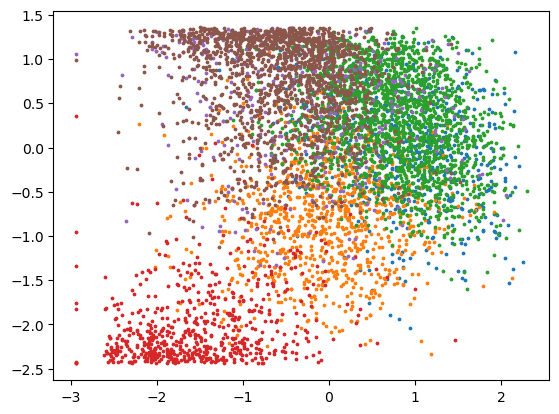

In [13]:
cluster_ids = kmeans.predict(data_norm)
cluster_distances = kmeans.transform(data_norm)
for c in np.unique(cluster_ids):
    plt.scatter(data_norm[cluster_ids == c, 0], data_norm[cluster_ids == c, 1], marker='.', s=12)
# if we wanted to use PCA, change data_norm here to predict(X_pca)

In [14]:
# merge the labels with the original dataframe 
data["cluster"]=kmeans.labels_

In [15]:
# and then I want to create dataframes with the songs from each of the clusters
C0_songs=pd.DataFrame(data.loc[data["cluster"]==0])
C1_songs=pd.DataFrame(data.loc[data["cluster"]==1])
C2_songs=pd.DataFrame(data.loc[data["cluster"]==2])
C3_songs=pd.DataFrame(data.loc[data["cluster"]==3])
C4_songs=pd.DataFrame(data.loc[data["cluster"]==4])
C5_songs=pd.DataFrame(data.loc[data["cluster"]==5])
len(C0_songs), len(C1_songs), len (C2_songs), len (C3_songs), len (C4_songs), len(C5_songs)

(666, 1002, 1967, 635, 378, 1630)

In [16]:
#and a dictionary with lists of IDs for each cluster
ids_dict={
    0:list(C0_songs.index), 
    1:list(C1_songs.index),
    2:list(C2_songs.index),
    3:list(C3_songs.index),
    4:list(C4_songs.index), 
    5:list(C5_songs.index)
    }

In [17]:
#in order to extract the means of their song measures 
C0_means=pd.DataFrame(C0_songs.describe())
C0_means.drop(columns="cluster", inplace=True)
cluster_0_means=C0_means.iloc[1:2:1]

In [18]:
C1_means=pd.DataFrame(C1_songs.describe())
C1_means.drop(columns="cluster", inplace=True)
cluster_1_means=C1_means.iloc[1:2:1]

In [19]:
C2_means=pd.DataFrame(C2_songs.describe())
C2_means.drop(columns="cluster", inplace=True)
cluster_2_means=C2_means.iloc[1:2:1]

In [20]:
C3_means=pd.DataFrame(C3_songs.describe())
C3_means.drop(columns="cluster", inplace=True)
cluster_3_means=C3_means.iloc[1:2:1]

In [21]:
C4_means=pd.DataFrame(C4_songs.describe())
C4_means.drop(columns="cluster", inplace=True)
cluster_4_means=C4_means.iloc[1:2:1]

In [22]:
C5_means=pd.DataFrame(C5_songs.describe())
C5_means.drop(columns="cluster", inplace=True)
cluster_5_means=C5_means.iloc[1:2:1]

In [23]:
cluster_means_all= pd.concat([cluster_0_means, cluster_1_means, cluster_2_means, cluster_3_means, cluster_4_means, cluster_5_means])
cluster_means_all.reset_index(inplace=True)
cluster_means_all.drop(columns="index", inplace=True)
cluster_means_all

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.710511,0.649198,-7.665114,0.349854,0.205612,0.020343,0.215397,0.594832,113.732715
1,0.548761,0.437129,-10.055599,0.053923,0.572075,0.085431,0.159142,0.456111,111.321129
2,0.694229,0.725034,-6.953547,0.069447,0.153464,0.066815,0.160007,0.736720,117.385139
3,0.274336,0.118975,-23.501337,0.045009,0.897956,0.663009,0.149028,0.160082,100.205050
4,0.488897,0.777262,-7.316759,0.118208,0.198043,0.124767,0.706489,0.493386,126.440508
5,0.445304,0.839582,-5.353045,0.081541,0.055910,0.072141,0.193490,0.417790,138.956917


In [24]:
cluster_means_all.to_csv("cluster_means_all.csv", sep=';', index=False)

## get the input & compare

In [25]:
# finally we will compare the input song to the means of the different clusters 
#and pick the one with the lowest difference to return a song. 
table_to_norm=pd.read_csv("cluster_means_all.csv", sep=';')

In [26]:
ids_dict={
    0:list(C0_songs.index), 
    1:list(C1_songs.index),
    2:list(C2_songs.index),
    3:list(C3_songs.index),
    4:list(C4_songs.index), 
    5:list(C5_songs.index)
    }

In [27]:
from IPython.display import IFrame
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/" + track_id,
                  width="320",
                  height="80",
                  frameborder="0",
                  allowtransparency="true",
                  allow="encrypted-media"
                 )

def input_track():
    user_track = input('Enter a track name: ')
    result = sp.search(q=user_track, limit=10)
    # display search results to the user
    for i, track in enumerate(result['tracks']['items']):
        print(f"{i+1}. {track['name']} - {track['artists'][0]['name']}")
    
    track_choice = int(input("Enter the number corresponding to the desired track: "))
    track_id = result['tracks']['items'][track_choice - 1]['id']
    
    #confirm 
    chosen_track = result['tracks']['items'][track_choice - 1]
    print(f"You have chosen: {chosen_track['name']} - {chosen_track['artists'][0]['name']}")
    confirmation = input("Is this the correct track? (y/n): ")

    if confirmation.lower() != 'y':
        print("Please try again.")
        return

    song_iframe = play_song(track_id)
    display(song_iframe)
    track_features = pd.DataFrame(sp.audio_features(track_id))
    track_features.drop(columns=['id','analysis_url','track_href','uri','type', 'key', 'mode', 'time_signature', 'duration_ms'], axis=1, inplace=True)
    return track_features

In [28]:
new_song2=input_track()

1. Demain, c'est loin - IAM
2. Demain c'est loin - Nej
3. Demain c'est loin - Bwwoy
4. Demain c'est loin - K.Maro
5. Demain c'est loin - RK
6. Demain c'est loin - LEKS
7. Demain c'est loin - Blasko
8. Demain C'est Loin - Hector Arthur
9. Demain c'est loin - Radio Edit - Kxng91
10. Demain c'est toi - Zaz
You have chosen: Demain, c'est loin - IAM


In [29]:
calculation= pd.concat([table_to_norm, new_song2])
measures_for_song= scaler.fit_transform(calculation)

In [30]:
len(measures_for_song)

7

In [31]:
def get_cluster():
    diff_clusters_dict={}
    for i in range (0,len(measures_for_song)-1):
        diff_clusters_dict[i]= abs(sum(measures_for_song[6]-measures_for_song[i]))
        selected=min(diff_clusters_dict, key=diff_clusters_dict.get)
    return selected

In [32]:
selected_cluster=get_cluster()
selected_cluster

4

In [33]:
# get a random song from the cluster identified above and play it. 
import random
recommended_track=random.choice(ids_dict[selected_cluster])
play_song(recommended_track)

In [34]:
new_song2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.778,0.799,-6.893,0.358,0.18,0,0.0643,0.841,180.143


In [37]:
a = pd.DataFrame(sp.audio_features(recommended_track))
a.drop(columns=['id','analysis_url','track_href','uri','type', 'key', 'mode', 'duration_ms', 'time_signature'], axis=1, inplace=True)
a

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.427,0.565,-13.44,0.133,0.718,0.0637,0.954,0.636,106.862


### Improvements 
* how useful is it to do a PCA before the analysis by kmeans? 
* identify ideal number of clusters (elbow)
* shorten code :) 